In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)
df_DA= df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


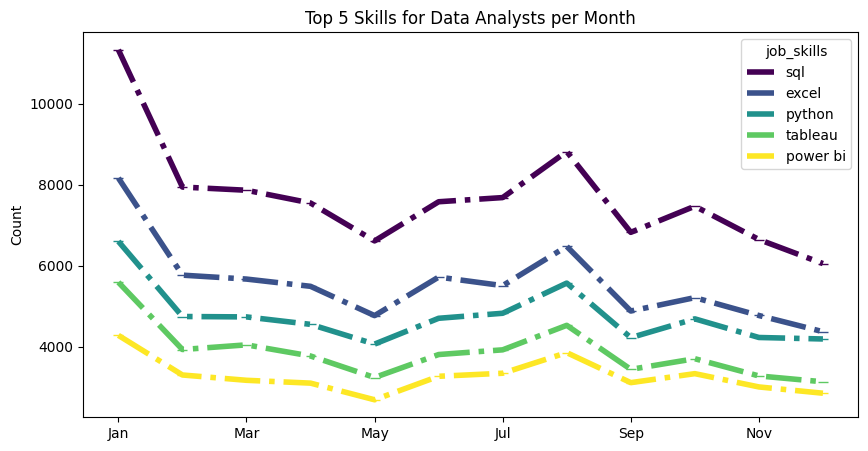

In [26]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop('Total')

#use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

#get top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4 ,#->these calls prameter 
    linestyle='-.', ## options: '-', '--', '-.', ':'
    colormap='viridis', #look to colors https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png
    marker='_',  # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=7,
    figsize=(10, 5)
    )

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [2]:
from adjustText import adjust_text

In [60]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20 #better than head(20) because easy to update
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats


,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


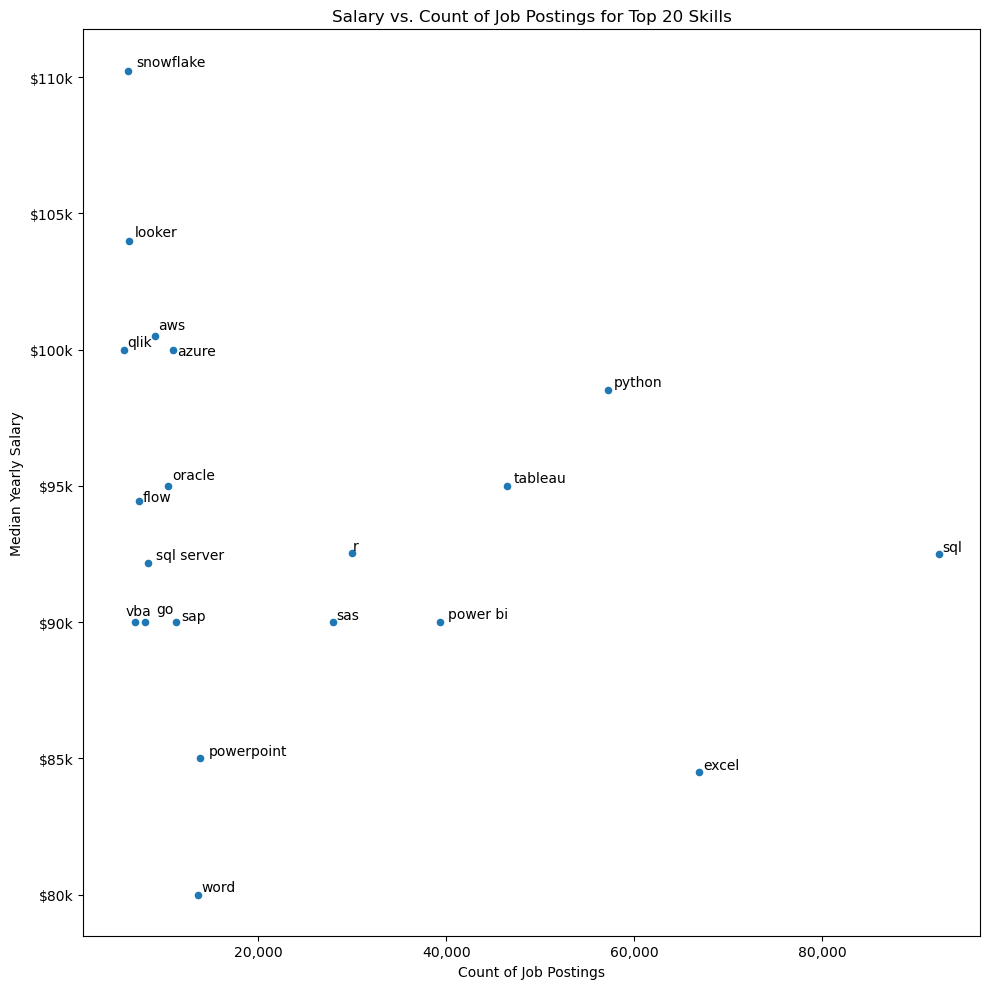

In [6]:
#fig,ax= plt.subplot()

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary',figsize=(10,10))

tests=[]

for i, txt in enumerate(skill_stats.index):
    tests.append(plt.text(skill_stats['skill_count'].iloc[i], 
                            skill_stats['median_salary'].iloc[i], txt)) #this represnt list 

adjust_text(tests)
# adjust_text(tests,arrowprops =dict(arrowstyle="->", color="gray", lw=0.5))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y ,pos:f'${int(y/1000)}k')) #we ignore pos in this case
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'{x/1000:1.1f}%'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'{int (x):,}'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

In [ ]:
#look to: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
#It imports  adjust_text`function from the **`adjustText`** library so you can use it in your code.
#conda install adjustText → installs from default channels
#conda install -c conda-forge adjustText
#conda install -c conda-forge adjustText→ installs from conda-forge channel if default fall
#adjust_text(frist prameter is list )


#→ arrowprops=...   : adds arrows from text to their original points.
# Inside dict():
#    arrowstyle="->" → arrow shape (simple arrow)
#    color='gray'    → arrow color
#    lw=0.5          → line width of the arrow

# arrowprops = dict(arrowstyle="->", color="gray", lw=0.5)
# Same as: arrowprops = {"arrowstyle": "->", "color": "gray", "lw": 0.5}

#note:adjust_text() requires a list of text objects (for example, the result of multiple plt.text()calls) 
# so it can move them to avoid overlap

#plt.gca() means “get current axes” in its memory address
#It returns the current Axes object (the part of the figure that holds the plot)
#you can’t use ax.yaxis unless you first have an Axes object by use plt.gca()
#ax.yaxis.set_major_formatter(): Change how the major tick labels on the y-axis are displayed.
#prameter of set_major_formatter() can be:string format,or Matplotlib formatter object e.g.FuncFormatter)
#FuncFormatter takes two prameter x,postion
#FuncFormatter is class lets you control exactly how tick labels appear using a function like lambda
#we can use any function use y, pos not only lambda

#The colon (:) starts the format specification — it tells Python how to format the value.

#ax = plt.gca() just retrieves the axes that already exists
#If you already have ax (from plt.subplots()), you don’t need Because plt.subplots() already 
# creates and returns the Axes object (ax) for you.
#plt.gca() is only used when you didn’t create ax yourself (like when using plain plt.plot()).

#ax = plt.gca(): Save that axes object in ax to modify it later










In [ ]:
# df_US_count_skills=df_US_count_skills[df_US_count['job_title_short'].isin(job_titles)]
# df_US_count
#job_titles=['Data Analyst','Data Engineer','Data Scientist']

# fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 12))
# for i, title in enumerate(job_titles):
#     df_plot = df_US_count_skills[df_US_count_skills['job_title_short'] == title].head(10)  # Limit to top 10 skills
#     sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i],hue='skill_count',palette='dark:b')
#     ax[i].set_title(title, fontsize=18)  # Add title for each subplot
#     ax[i].set_xlabel('Skill Count')
#     ax[i].set_ylabel('Skills')
  
# fig.tight_layout()
# plt.show()

In [ ]:
# df_US_count_skills=df_US_count_skills[df_US_count['job_title_short'].isin(job_titles)]
# df_US_count
#job_titles=['Data Analyst','Data Engineer','Data Scientist']

# fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 12))
# for i, title in enumerate(job_titles):
#     df_plot = df_US_count_skills[df_US_count_skills['job_title_short'] == title].head(10)  # Limit to top 10 skills
#     sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i],hue='skill_count',palette='dark:b')
#     ax[i].set_title(title, fontsize=18)  # Add title for each subplot
#     ax[i].set_xlabel('Skill Count')
#     ax[i].set_ylabel('Skills')
  
# fig.tight_layout()
# plt.show()